**Importar librerías necesarias**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Configuración de gráficos**

In [3]:
plt.style.use('ggplot')
sns.set_palette('pastel')

**Cargar el dataset limpio**

In [4]:
file_path = 'Data/processed/cleaned_tickets.csv'
df = pd.read_csv(file_path)

**Resumen inicial de los datos**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18963 entries, 0 to 18962
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaint_what_happened  18963 non-null  object
 1   ticket_classification    18963 non-null  object
dtypes: object(2)
memory usage: 296.4+ KB


In [11]:
df.head()

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account


**Descripción estadística de las columnas**

In [12]:
df.describe(include='all')

,complaint_what_happened,ticket_classification
count,18963,18963
unique,18824,78
top,Chase has violated 15 USC 1692 by continuing c...,Credit card or prepaid card + General-purpose ...
freq,11,4918


**Verificar datos faltantes**

In [13]:
missing_values = df.isnull().sum()
missing_values

complaint_what_happened    0
ticket_classification      0
dtype: int64

**Distribución de la longitud del texto en `complaint_what_happened`**

c:\Users\pacol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


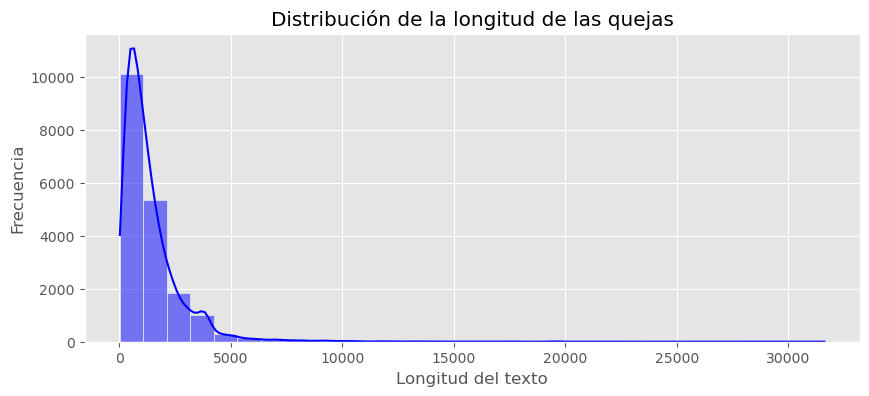

In [16]:
df['complaint_length'] = df['complaint_what_happened'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 4))
sns.histplot(df['complaint_length'], bins=30, kde=True, color='blue')
plt.title("Distribución de la longitud de las quejas")
plt.xlabel("Longitud del texto")
plt.ylabel("Frecuencia")
plt.show()

Las quejas tienden a ser concisas, aunque algunas pocas tienen una longitud considerablemente mayor, lo que podría indicar casos más complejos o detallados.

**Conteo de categorías principales en `ticket_classification`**

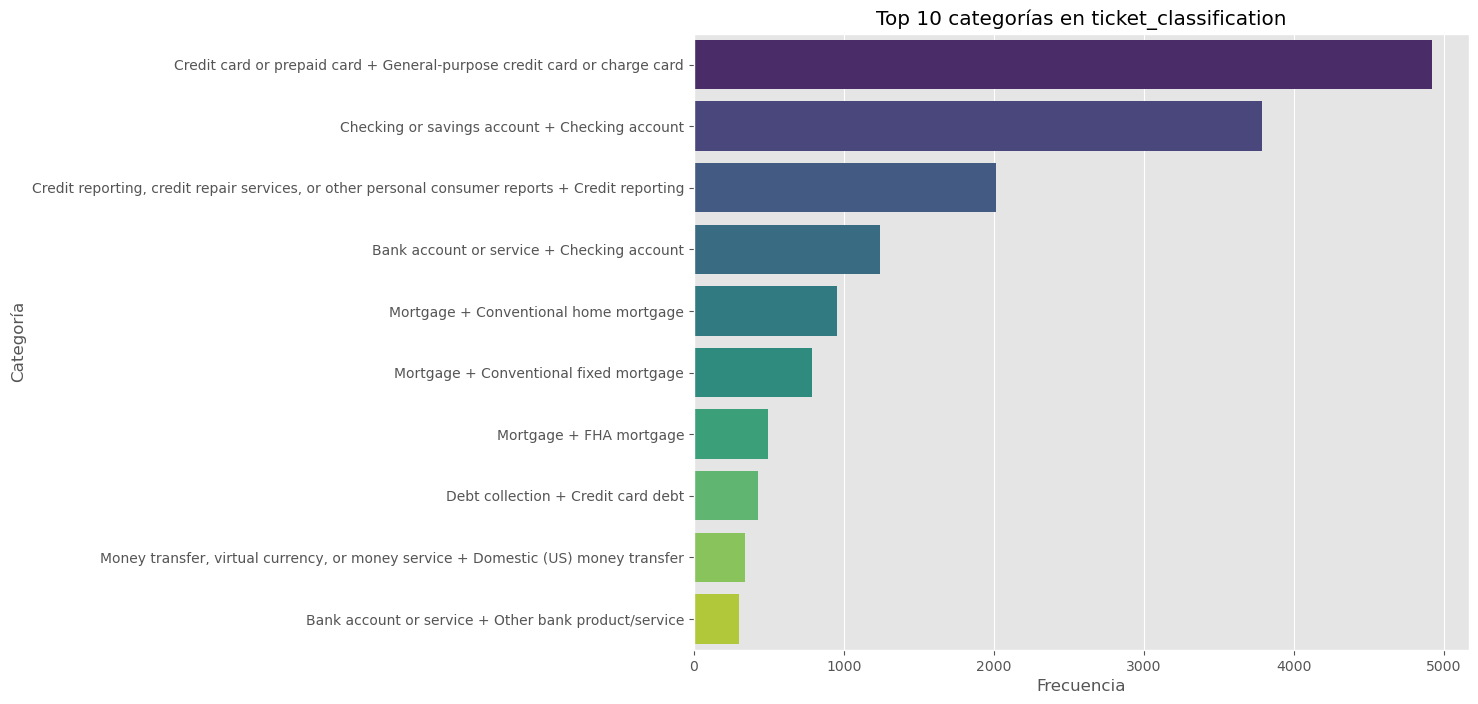

In [19]:
plt.figure(figsize=(10, 8))
category_counts = df['ticket_classification'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title("Top 10 categorías en ticket_classification")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría")
plt.show()

La categoría más frecuente es relacionada con "Tarjetas de crédito o prepagadas", seguida por quejas de cuentas bancarias y reportes crediticios.

Esto refleja que estos servicios son los más propensos a generar quejas entre los clientes.

**Análisis de palabras más frecuentes en `complaint_what_happened`**

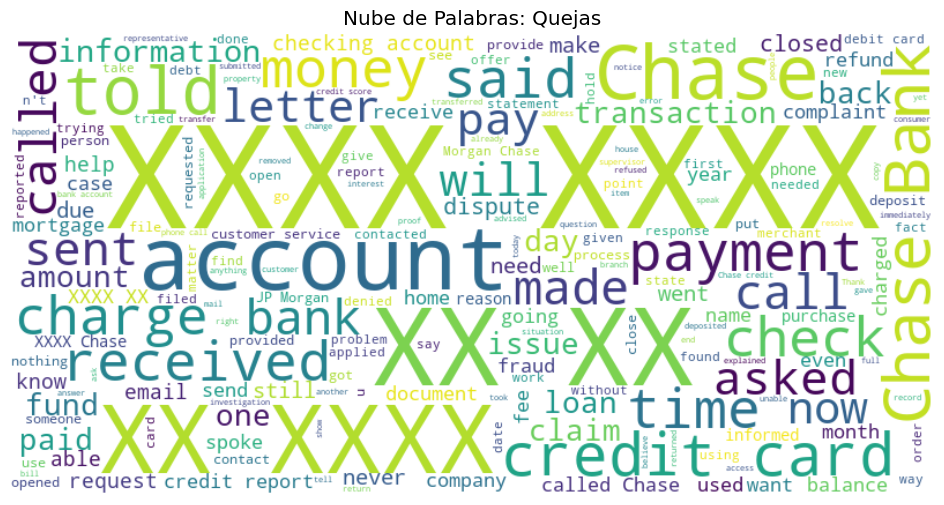

In [20]:
from wordcloud import WordCloud

text = " ".join(df['complaint_what_happened'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Nube de Palabras: Quejas")
plt.axis("off")
plt.show()

Términos como "account", "credit card", "payment", "bank" son los más comunes, lo que sugiere que las quejas están relacionadas principalmente con cuentas bancarias y pagos.

Las palabras censuradas como "XXXX" indican que ciertos datos personales fueron ocultados, probablemente para proteger la privacidad de los usuarios.

**Correlación entre longitud de texto y categorías**

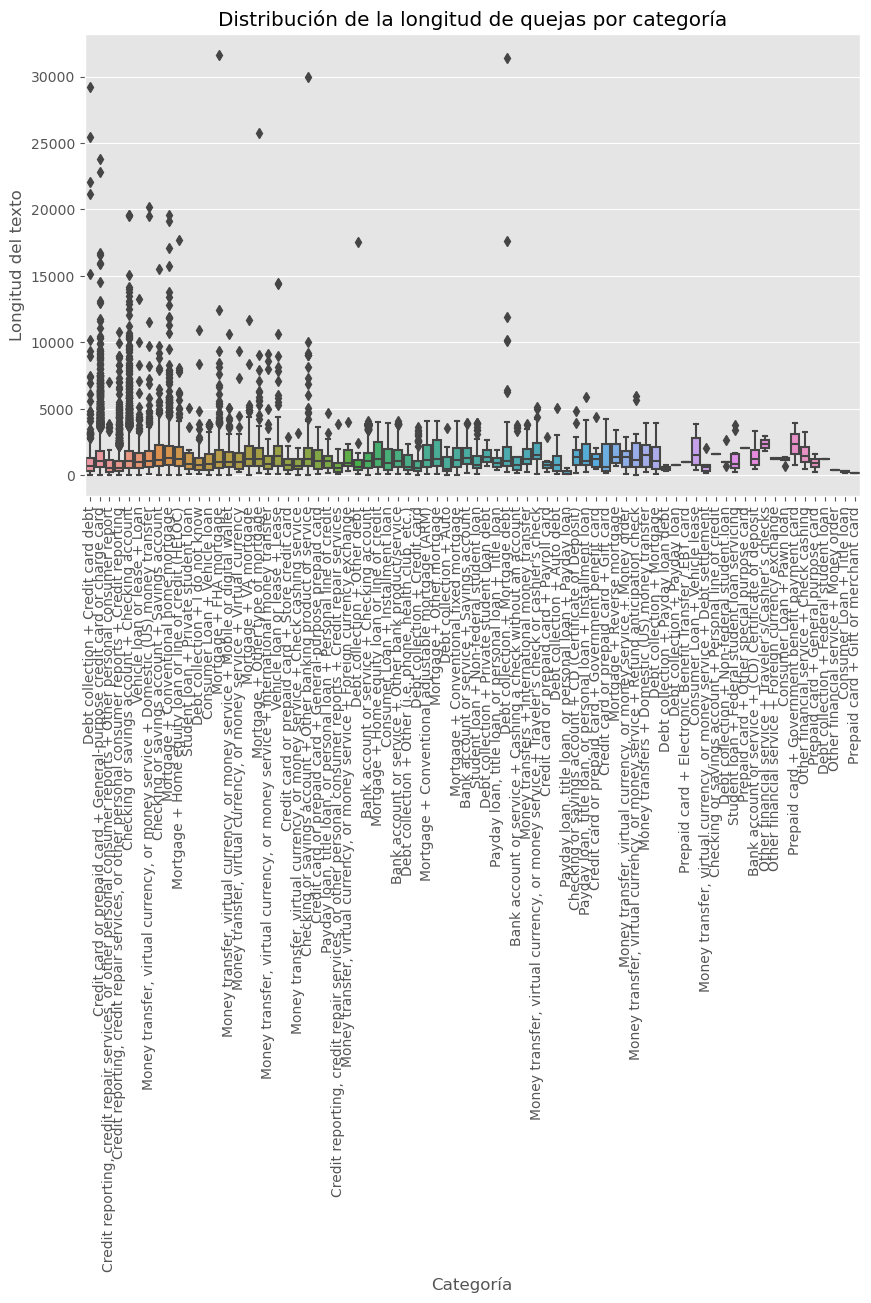

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ticket_classification', y='complaint_length')
plt.xticks(rotation=90)
plt.title("Distribución de la longitud de quejas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Longitud del texto")
plt.show()

Aunque la longitud promedio de las quejas es consistente entre categorías, algunas presentan una mayor dispersión.

Las categorías con valores atípicos podrían contener casos más detallados o excepcionales.